In [80]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
# Step 2: Load the dataset
file_path=r'D:\PPC\Git\Sales-Business-Development-Analyst\Sales_Project\data\SampleSuperstore.csv'
df=pd.read_csv(file_path,encoding='latin1')

In [4]:
df.head(2)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,sub_category,product_name,sales,quantity,discount,profit,order_month,order_year,profit_margin,total_cost
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,2016,16.0,220.0464
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,2016,30.0,512.3580


In [5]:
#view general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   ship_date      9994 non-null   object 
 4   ship_mode      9994 non-null   object 
 5   customer_id    9994 non-null   object 
 6   customer_name  9994 non-null   object 
 7   segment        9994 non-null   object 
 8   country        9994 non-null   object 
 9   city           9994 non-null   object 
 10  state          9994 non-null   object 
 11  postal_code    9994 non-null   int64  
 12  region         9994 non-null   object 
 13  product_id     9994 non-null   object 
 14  category       9994 non-null   object 
 15  sub_category   9994 non-null   object 
 16  product_name   9994 non-null   object 
 17  sales          9994 non-null   float64
 18  quantity

In [6]:
#summary statistic
df.describe()

,row_id,postal_code,sales,quantity,discount,profit,order_month,order_year,profit_margin,total_cost
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,7.809686,2015.722233,12.031393,201.201105
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,3.284654,1.123555,46.675435,550.839414
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.000000,2014.000000,-275.000000,0.554400
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,5.000000,2015.000000,7.500000,12.688200
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,9.000000,2016.000000,27.000000,41.664000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,11.000000,2017.000000,36.250000,182.226300
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,12.000000,2017.000000,50.000000,24449.558400


In [7]:
# Check for missing values
df.isnull().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
order_month      0
order_year       0
profit_margin    0
total_cost       0
dtype: int64

In [8]:
# Check column names
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'order_month', 'order_year', 'profit_margin', 'total_cost'],
      dtype='object')

In [9]:
# Count duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
# Step 1: Check current data types
df.dtypes

row_id             int64
order_id          object
order_date        object
ship_date         object
ship_mode         object
customer_id       object
customer_name     object
segment           object
country           object
city              object
state             object
postal_code        int64
region            object
product_id        object
category          object
sub_category      object
product_name      object
sales            float64
quantity           int64
discount         float64
profit           float64
order_month        int64
order_year         int64
profit_margin    float64
total_cost       float64
dtype: object

In [11]:
df['order_date']=pd.to_datetime(df['order_date'])
df['ship_date']=pd.to_datetime(df['ship_date'])

In [12]:
# Step 3: Rename columns (optional but makes analysis cleaner)
df.rename(columns={
    'Row ID': 'row_id',
    'Order ID': 'order_id',
    'Order Date': 'order_date',
    'Ship Date': 'ship_date',
    'Ship Mode': 'ship_mode',
    'Customer ID': 'customer_id',
    'Customer Name': 'customer_name',
    'Segment': 'segment',
    'Country': 'country',
    'City': 'city',
    'State': 'state',
    'Postal Code': 'postal_code',
    'Region': 'region',
    'Product ID': 'product_id',
    'Category': 'category',
    'Sub-Category': 'sub_category',
    'Product Name': 'product_name',
    'Sales': 'sales',
    'Quantity': 'quantity',
    'Discount': 'discount',
    'Profit': 'profit'
    }, inplace=True)
df.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
order_month               int64
order_year                int64
profit_margin           float64
total_cost              float64
dtype: object

In [13]:
# Step 4: Extract Month and Year for trend analysis
df['order_month'] = df['order_date'].dt.month
df['order_year'] = df['order_date'].dt.year
df.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
order_month               int32
order_year                int32
profit_margin           float64
total_cost              float64
dtype: object

In [14]:
# Step 5: Calculate Profit Margin (Profit / Sales)
df['profit_margin'] = df['profit']/df['sales']*100
df['profit_margin'].mean()

np.float64(12.031392972104458)

In [15]:
# Step 6: Calculate Total Cost (Sales - Profit)
df['total_cost'] = df['sales']-df['profit']
df['total_cost'].sum()

np.float64(2010803.8386000001)

In [16]:
clean_path = r'D:\PPC\Git\Sales-Business-Development-Analyst\Sales_Project\data\SampleSuperstore.csv'
df.to_csv(clean_path, index=False)
print("✅ Clean data saved successfully!")

✅ Clean data saved successfully!


In [21]:
df.head(2)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,sub_category,product_name,sales,quantity,discount,profit,order_month,order_year,profit_margin,total_cost
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,2016,16.0,220.0464
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,2016,30.0,512.3580


In [23]:
#tells pandas to show all columns instead of truncating them
pd.set_option('display.max_columns', None)
df.head(2)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,order_month,order_year,profit_margin,total_cost
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,2016,16.0,220.0464
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,2016,30.0,512.3580


In [28]:
df[['sales','profit','quantity','discount']].describe()

,sales,profit,quantity,discount
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,3.789574,0.156203
std,623.245101,234.260108,2.225110,0.206452
min,0.444000,-6599.978000,1.000000,0.000000
25%,17.280000,1.728750,2.000000,0.000000
50%,54.490000,8.666500,3.000000,0.200000
75%,209.940000,29.364000,5.000000,0.200000
max,22638.480000,8399.976000,14.000000,0.800000


In [31]:
# Total sales and profit
total_sales = df['sales'].sum()
total_profit = df['profit'].sum()
total_orders = df['order_id'].nunique()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Orders: {total_orders}")

Total Sales: $2,297,200.86
Total Profit: $286,397.02
Total Orders: 5009


In [44]:
sales_by_year = df.groupby('order_year')[['sales','profit']].sum().reset_index()
sales_by_year

,order_year,sales,profit
0,2014,484247.4981,49543.9741
1,2015,470532.5090,61618.6037
2,2016,609205.5980,81795.1743
3,2017,733215.2552,93439.2696


In [64]:
top_products = df.groupby(['sub_category','product_name'])[['sales','profit']].sum().sort_values('profit',ascending=False).head(10).reset_index()
top_products

,sub_category,product_name,sales,profit
0,Copiers,Canon imageCLASS 2200 Advanced Copier,61599.824,25199.9280
1,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,7753.0390
2,Copiers,Hewlett Packard LaserJet 3310 Copier,18839.686,6983.8836
3,Copiers,Canon PC1060 Personal Laser Copier,11619.834,4570.9347
4,Machines,HP Designjet T520 Inkjet Large Format Printer ...,18374.895,4094.9766
5,Machines,Ativa V4110MDD Micro-Cut Shredder,7699.890,3772.9461
6,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",14299.890,3717.9714
7,Accessories,Plantronics Savi W720 Multi-Device Wireless He...,9367.290,3696.2820
8,Binders,Ibico EPK-21 Electric Binding System,15875.916,3345.2823
9,Machines,Zebra ZM400 Thermal Label Printer,6965.700,3343.5360


In [60]:
region_category = df.groupby(['region','category'])[['sales','profit']].sum().reset_index()
region_category

,region,category,sales,profit
0,Central,Furniture,163797.1638,-2871.0494
1,Central,Office Supplies,167026.4150,8879.9799
2,Central,Technology,170416.3120,33697.4320
3,East,Furniture,208291.2040,3046.1658
4,East,Office Supplies,205516.0550,41014.5791
5,East,Technology,264973.9810,47462.0351
6,South,Furniture,117298.6840,6771.2061
7,South,Office Supplies,125651.3130,19986.3928
8,South,Technology,148771.9080,19991.8314
9,West,Furniture,252612.7435,11504.9503


In [123]:
df.corr(numeric_only=True).round(1)

,row_id,postal_code,sales,quantity,discount,profit,order_month,order_year,profit_margin,total_cost
row_id,1.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
postal_code,0.0,1.0,-0.0,0.0,0.1,-0.0,0.0,0.0,-0.1,-0.0
sales,-0.0,-0.0,1.0,0.2,-0.0,0.5,-0.0,-0.0,0.0,0.9
quantity,-0.0,0.0,0.2,1.0,0.0,0.1,0.0,-0.0,-0.0,0.2
discount,0.0,0.1,-0.0,0.0,1.0,-0.2,-0.0,-0.0,-0.9,0.1
profit,0.0,-0.0,0.5,0.1,-0.2,1.0,-0.0,0.0,0.2,0.1
order_month,-0.0,0.0,-0.0,0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0
order_year,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,1.0,0.0,-0.0
profit_margin,-0.0,-0.1,0.0,-0.0,-0.9,0.2,0.0,0.0,1.0,-0.1
total_cost,-0.0,-0.0,0.9,0.2,0.1,0.1,-0.0,-0.0,-0.1,1.0


C:\Users\nezha\AppData\Local\Temp\ipykernel_14492\3279561430.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_year',y='sales',data=sales_by_year,palette='Blues_d',width=0.3)


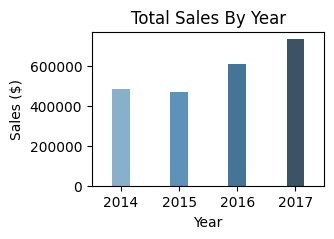

In [96]:
#Basic Visualizations
#Sales by Year
plt.figure(figsize=(3,2))
sns.barplot(x='order_year',y='sales',data=sales_by_year,palette='Blues_d',width=0.3)
plt.title('Total Sales By Year')
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.show()

C:\Users\nezha\AppData\Local\Temp\ipykernel_14492\2832960518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products['profit'],y=top_products['product_name'],palette='viridis')


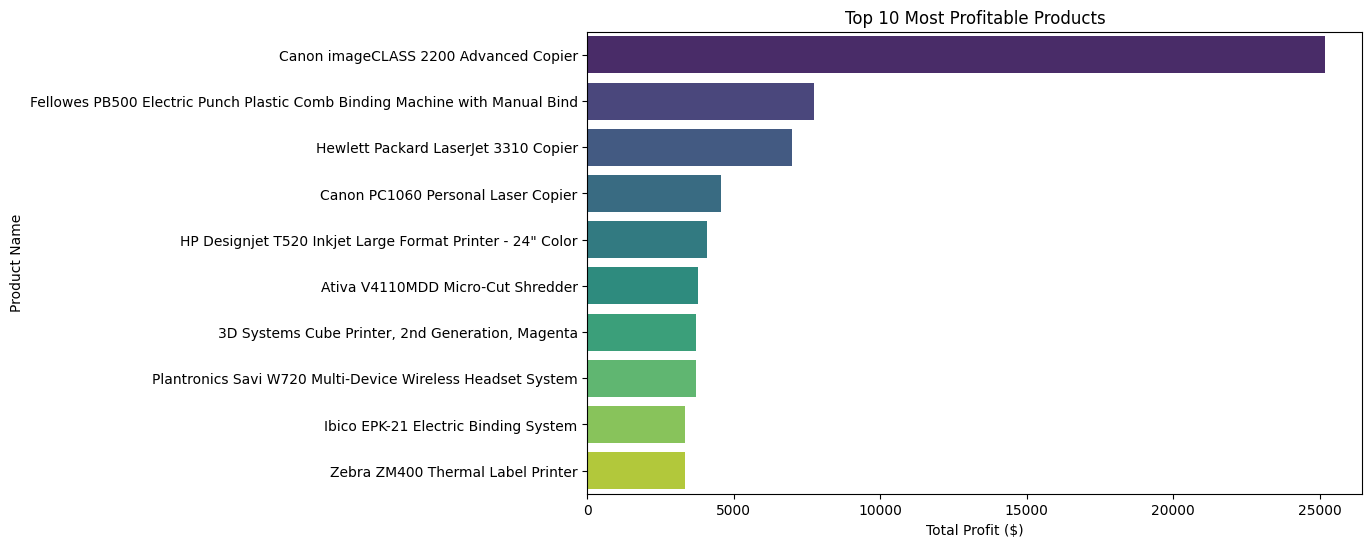

In [113]:
#Top 10 Products by Profit
plt.figure(figsize=(10,6))
sns.barplot(x=top_products['profit'],y=top_products['product_name'],palette='viridis')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Profit ($)')
plt.ylabel('Product Name')
plt.show()


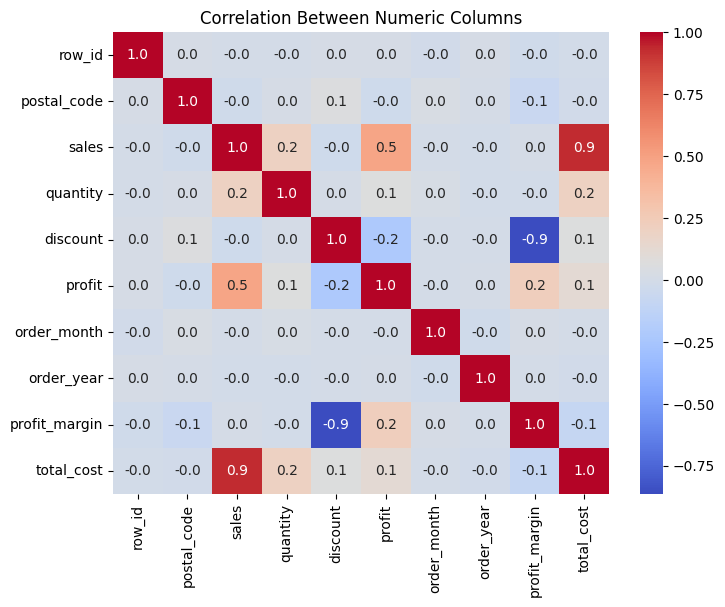

In [122]:
#Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='.1f')
plt.title('Correlation Between Numeric Columns')
plt.show()

In [124]:
#Code: Calculate Key KPIs

In [154]:
# 1. General KPIs
total_sales = df['sales'].sum()
total_profit = df['profit'].sum()
avg_margin = df['profit_margin'].mean()

print(f'Total Sales: ${total_sales:,.2f}')
print(f'Total Profit: ${total_profit:,.2f}')
print(f'Aerage Margin: {avg_margin:.2f}%')

Total Sales: $2,297,200.86
Total Profit: $286,397.02
Aerage Margin: 12.03%
